In [5]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pandarallel import pandarallel
import multiprocessing
from Increment_Sequence import increasing_sequence, count_increasing_sequences
pandarallel.initialize(progress_bar=True, nb_workers=multiprocessing.cpu_count())

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [6]:
files = os.listdir('./data')
files.remove('.ipynb_checkpoints')
files.remove('line_plot.csv')
files


['pythia-70m.pkl',
 'pythia-160m.pkl',
 'pythia-410m.pkl',
 'pythia-1b.pkl',
 'pythia-1.4b.pkl',
 'pythia-2.8b.pkl',
 'pythia-6.9b.pkl',
 'pythia-70m-deduped.pkl',
 'pythia-160m-deduped.pkl',
 'pythia-410m-deduped.pkl',
 'pythia-1b-deduped.pkl',
 'pythia-1.4b-deduped.pkl',
 'pythia-2.8b-deduped.pkl',
 'pythia-6.9b-deduped.pkl',
 'pythia-70m.pkl_with_inc_seq']

In [42]:
file_list = list()
count_memorized_list = list()
total_count_list=list()
count=0
for file in files:
#     def_temp = pd.DataFrame(columns=['file', 'count_memorized', 'total_count'])
    df = pickle.load(open('./data/' + file, 'rb'))
    df_total_count = df['tokens'].parallel_apply(len)
    df_count_memorized = df['detokenized'].parallel_apply(count_increasing_sequences)
    total_count = df_total_count.sum()
    count_memorized = df_count_memorized.sum()
    file_list.append(file)
    count_memorized_list.append(count_memorized)
    total_count_list.append(total_count)

initial_data = {'file': file_list,
                'count_memorized': count_memorized_list,
                'total_count': total_count_list }
 
df_ratios = pd.DataFrame(initial_data, columns = ['file', 'count_memorized', 'total_count'])
df_ratios

,file,count_memorized,total_count
0,pythia-70m.pkl,9430619,29692992
1,pythia-160m.pkl,14150290,44139072
2,pythia-410m.pkl,20037918,62101824
3,pythia-1b.pkl,26029906,80393024
4,pythia-1.4b.pkl,28507009,87918208
5,pythia-2.8b.pkl,34842559,107204928
6,pythia-6.9b.pkl,44192723,135742016
7,pythia-70m-deduped.pkl,8409512,26332672
8,pythia-160m-deduped.pkl,11993978,37196480
9,pythia-410m-deduped.pkl,16840583,51906496


/tmp/ipykernel_2882874/3364716675.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  plt.plot(df_ratios[df_ratios['file'].str.contains('deduped')]['file'].str.replace('-deduped', '').str.replace('.pkl', '').str.replace('pythia-',''),
/tmp/ipykernel_2882874/3364716675.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  for x, y in zip(df_ratios[df_ratios['file'].str.contains('deduped')]['file'].str.replace('-deduped', '').str.replace('.pkl', '').str.replace('pythia-',''),
/tmp/ipykernel_2882874/3364716675.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  plt.plot(df_ratios[~df_ratios['file'].str.contains('deduped')]['file'].str.replace('.pkl', '').str.replace('pythia-',''),
/tmp/ipykernel_2882874/3364716675.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  for x, y in zip(df_ratios[~

Text(0.5, 1.0, 'Count of memorized for each dataset')

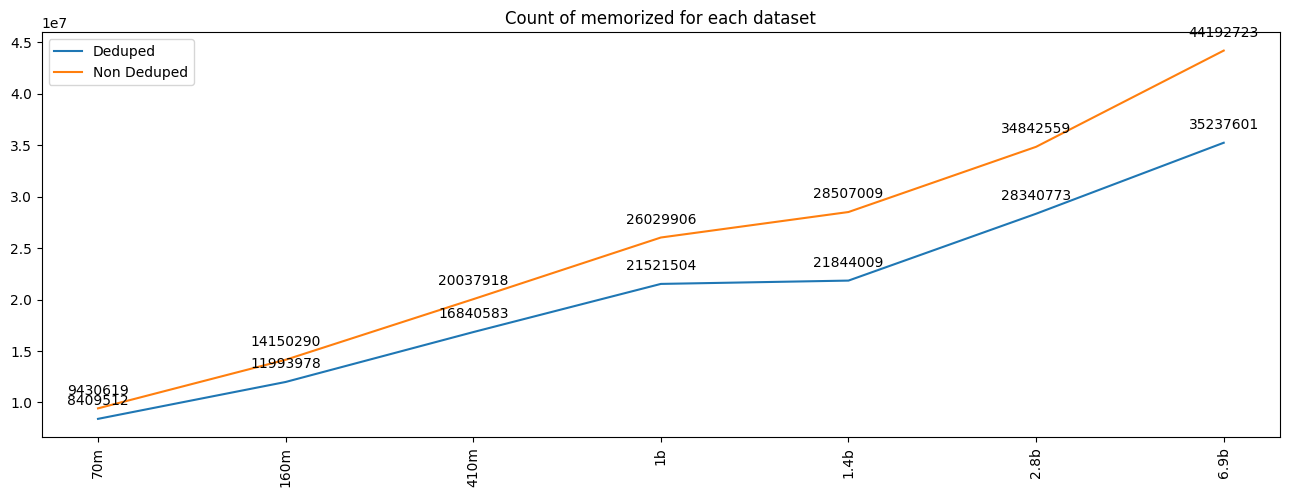

In [43]:
plt.figure(figsize=(13, 5))
# line plot
plt.plot(df_ratios[df_ratios['file'].str.contains('deduped')]['file'].str.replace('-deduped', '').str.replace('.pkl', '').str.replace('pythia-',''),
         df_ratios[df_ratios['file'].str.contains('deduped')]['count_memorized'], label='Deduped')
# label points
for x, y in zip(df_ratios[df_ratios['file'].str.contains('deduped')]['file'].str.replace('-deduped', '').str.replace('.pkl', '').str.replace('pythia-',''),
                df_ratios[df_ratios['file'].str.contains('deduped')]['count_memorized']):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x, y-1000), textcoords="offset points", xytext=(0, 10), ha='center')
# line plot of not deduped
plt.plot(df_ratios[~df_ratios['file'].str.contains('deduped')]['file'].str.replace('.pkl', '').str.replace('pythia-',''),
            df_ratios[~df_ratios['file'].str.contains('deduped')]['count_memorized'], label='Non Deduped')
# label points
for x, y in zip(df_ratios[~df_ratios['file'].str.contains('deduped')]['file'].str.replace('.pkl', '').str.replace('pythia-',''),
                df_ratios[~df_ratios['file'].str.contains('deduped')]['count_memorized']):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
# rotate xticks
plt.xticks(rotation=90)
# bboc inches tight
plt.tight_layout()
plt.legend()
plt.title('Count of memorized for each dataset')

In [8]:
file_list = list()
inc_list = list()
non_list=list()
total_list=list()
for file in files:
    df = pickle.load(open('./data/' + file, 'rb'))
    df['count'] = df['detokenized'].parallel_apply(count_increasing_sequences)
    total = df['count'].shape[0]
    inc = df[df['count']>0].shape[0]
    non = total-inc
    file_list.append(file)
    inc_list.append(inc)
    non_list.append(non)
    total_list.append(total)

initial_data = {'file': file_list,
                'inc': inc_list,
                'non': non_list, 
                'total': total_list}
 
df_ratios = pd.DataFrame(initial_data, columns = ['file', 'inc', 'non','total'])
df_ratios



,file,inc,non,total
0,pythia-70m.pkl,460385,3568,463953
1,pythia-160m.pkl,685935,3738,689673
2,pythia-410m.pkl,966426,3915,970341
3,pythia-1b.pkl,1252048,4093,1256141
4,pythia-1.4b.pkl,1369675,4047,1373722
5,pythia-2.8b.pkl,1670757,4320,1675077
6,pythia-6.9b.pkl,2115643,5326,2120969
7,pythia-70m-deduped.pkl,407368,4080,411448
8,pythia-160m-deduped.pkl,577449,3746,581195
9,pythia-410m-deduped.pkl,806558,4481,811039


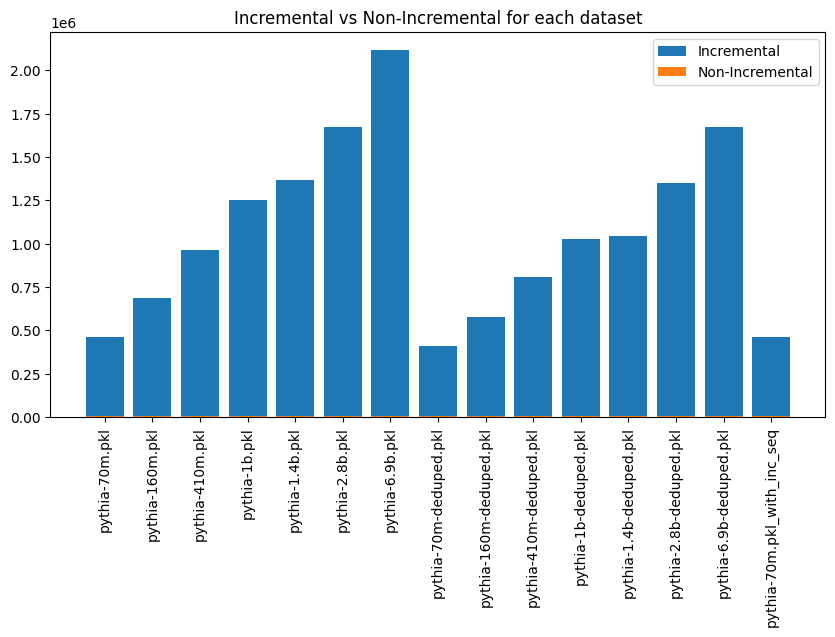

In [10]:
# plot ratio_2_total and ratio_3_total
plt.figure(figsize=(10, 5))
plt.bar(df_ratios['file'], df_ratios['inc'], label='Incremental')
plt.bar(df_ratios['file'], df_ratios['non'], label='Non-Incremental')
# rotate xticks
plt.xticks(rotation=90)
plt.title('Incremental vs Non-Incremental for each dataset')
plt.legend()

In [11]:
df_ratios

,file,inc,non,total
0,pythia-70m.pkl,460385,3568,463953
1,pythia-160m.pkl,685935,3738,689673
2,pythia-410m.pkl,966426,3915,970341
3,pythia-1b.pkl,1252048,4093,1256141
4,pythia-1.4b.pkl,1369675,4047,1373722
5,pythia-2.8b.pkl,1670757,4320,1675077
6,pythia-6.9b.pkl,2115643,5326,2120969
7,pythia-70m-deduped.pkl,407368,4080,411448
8,pythia-160m-deduped.pkl,577449,3746,581195
9,pythia-410m-deduped.pkl,806558,4481,811039
